In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
train_df = pd.read_csv('train_fNxu4vz.csv',thousands=',')
test_df = pd.read_csv('test_fjtUOL8.csv',thousands=',')

In [ ]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
train_df.shape

(164309, 14)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int64  
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
train_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

<Axes: xlabel='Interest_Rate'>

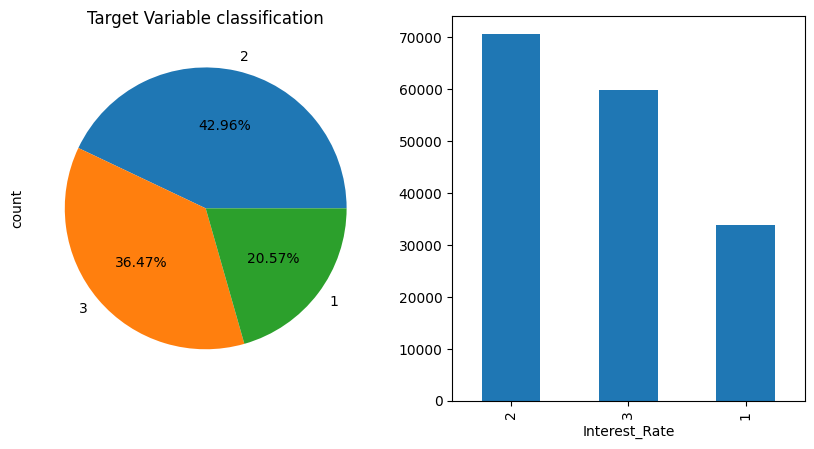

In [ ]:
plt.subplot(121)
train_df['Interest_Rate'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (18,8),title = 'Target Variable classification')
plt.subplot(122)
train_df['Interest_Rate'].value_counts().plot.bar(figsize = (10,5))

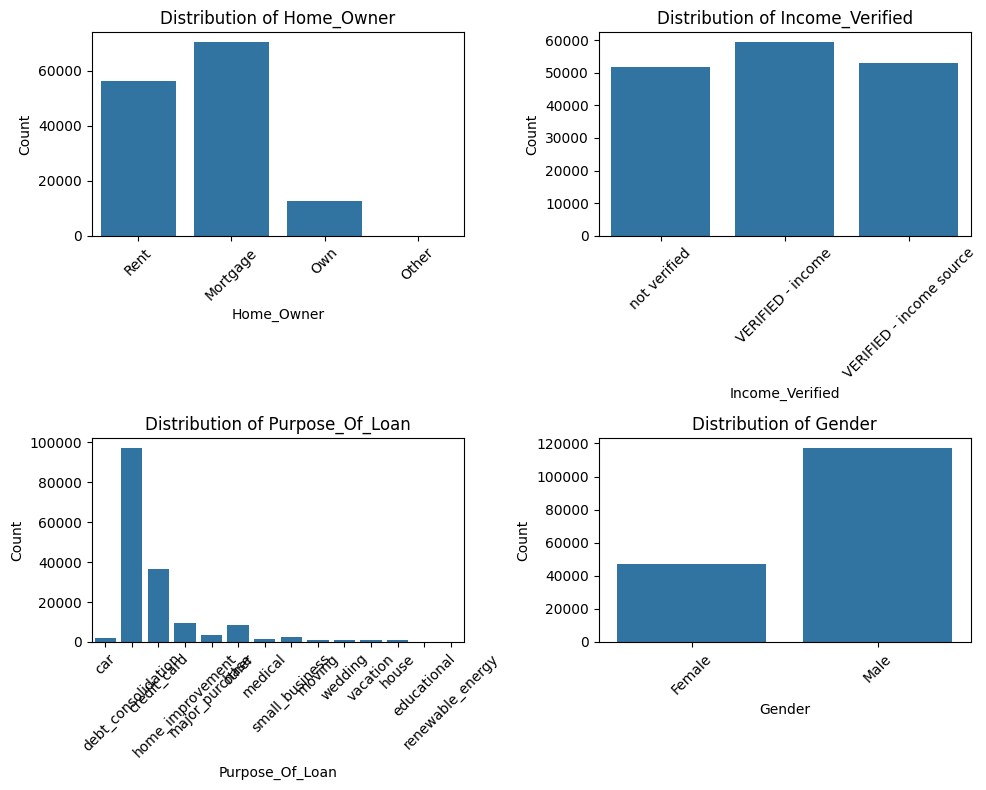

In [ ]:

categorical_columns = ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=train_df, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income',
                     'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']


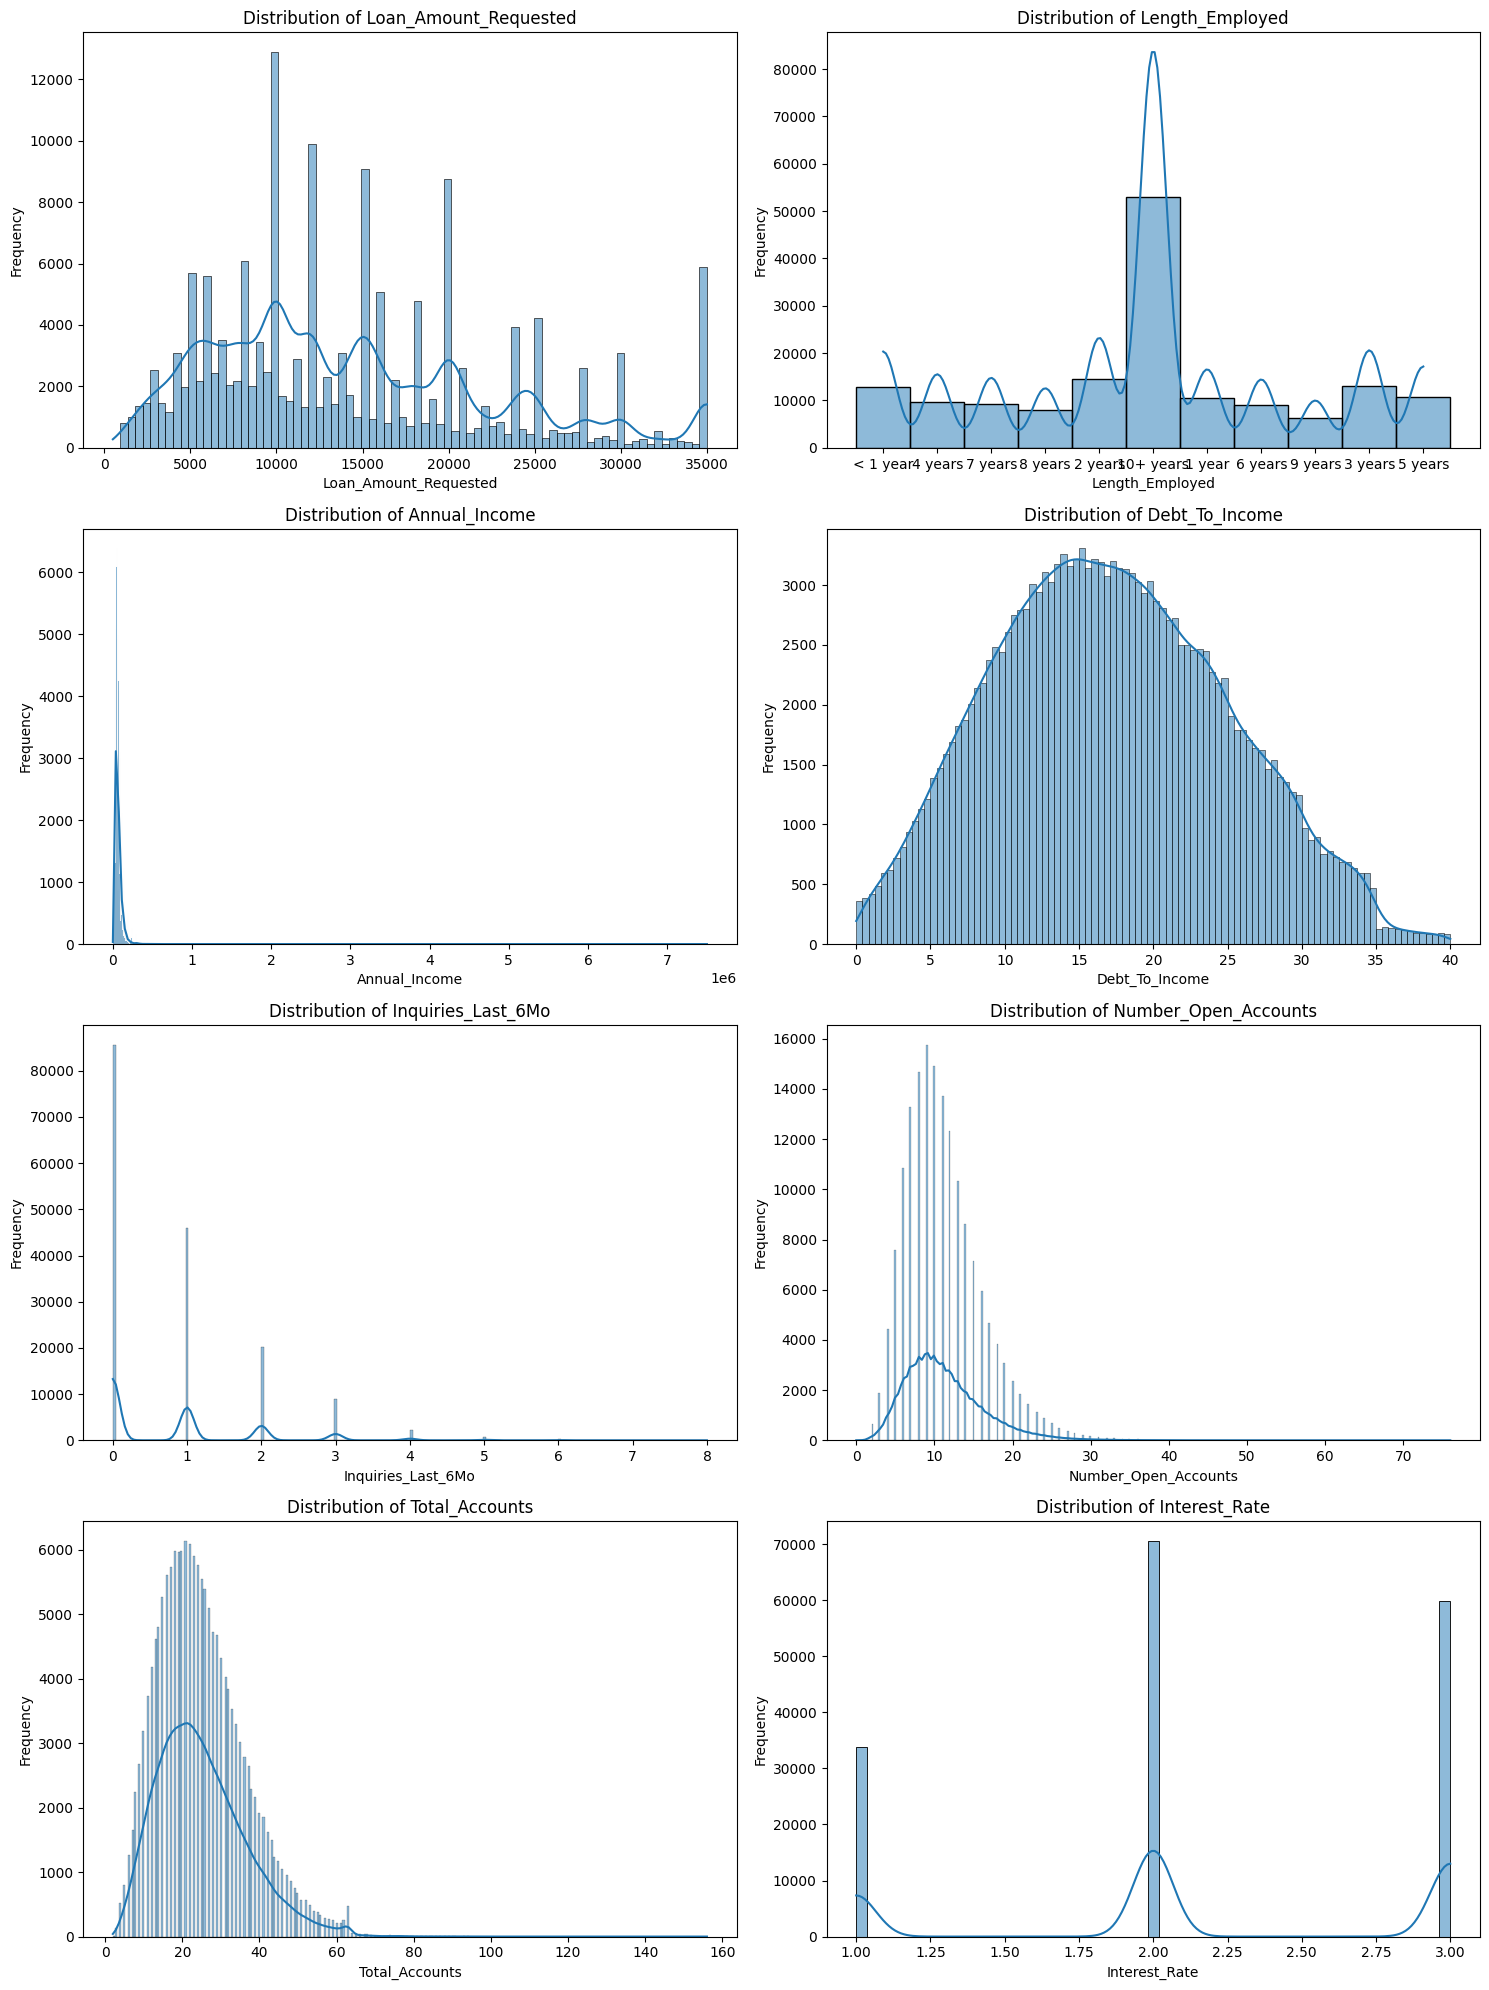

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(data=train_df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
if 'Months_Since_Deliquency' in train_df.columns:
    train_df = train_df.drop(columns=['Months_Since_Deliquency'])

train_df = train_df.dropna()

feature_columns = [
    'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income',
    'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo',
    'Number_Open_Accounts', 'Total_Accounts', 'Gender'
]
target_column = 'Interest_Rate'


features_to_drop = ['Gender', 'Home_Owner']
feature_columns = [col for col in feature_columns if col not in features_to_drop]

X = train_df[feature_columns]
y = train_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def create_features(df):
    df['loan_income_ratio'] = df['Loan_Amount_Requested'] / df['Annual_Income']
    df['total_income_ratio'] = df['Total_Accounts'] / df['Annual_Income']
    df['debt_income_ratio'] = df['Debt_To_Income'] / df['Annual_Income']
    return df

X_train = create_features(X_train)
X_test = create_features(X_test)


numerical_columns = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
                     'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts','loan_income_ratio',"total_income_ratio",
                     "debt_income_ratio"]
categorical_columns = ['Length_Employed', 'Income_Verified', 'Purpose_Of_Loan']

X_train[categorical_columns] = X_train[categorical_columns].astype(str)
X_test[categorical_columns] = X_test[categorical_columns].astype(str)


In [ ]:
class StandardScalerScratch:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

class OneHotEncoderScratch:
    def __init__(self):
        self.categories_ = None

    def fit(self, X):
        self.categories_ = [np.unique(col) for col in X.T]
        return self

    def transform(self, X):
        one_hot_encoded = []
        for i, col in enumerate(X.T):
            one_hot = np.zeros((X.shape[0], len(self.categories_[i])))
            for j, category in enumerate(self.categories_[i]):
                one_hot[:, j] = (col == category).astype(int)
            one_hot_encoded.append(one_hot)
        return np.hstack(one_hot_encoded)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

class LabelEncoderScratch:
    def __init__(self):
        self.classes_ = {}

    def fit(self, X):

        for i, col in enumerate(X.T):
            self.classes_[i] = {label: idx for idx, label in enumerate(np.unique(col))}
        return self

    def transform(self, X):
        X_encoded = np.zeros(X.shape, dtype=int)
        for i, col in enumerate(X.T):
            X_encoded[:, i] = [self.classes_[i][label] for label in col]
        return X_encoded

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE


scaler = StandardScalerScratch()
label_encoder_scratch = LabelEncoderScratch()


X_train_scaled = scaler.fit_transform(X_train[numerical_columns].values)
X_test_scaled = scaler.transform(X_test[numerical_columns].values)


X_train_encoded = label_encoder_scratch.fit_transform(X_train[categorical_columns].values)
X_test_encoded = label_encoder_scratch.transform(X_test[categorical_columns].values)


X_train_processed = np.hstack([X_train_scaled, X_train_encoded])
X_test_processed = np.hstack([X_test_scaled, X_test_encoded])


y_train_encoded = label_encoder_scratch.fit_transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_encoded = label_encoder_scratch.transform(y_test.values.reshape(-1, 1))[:, 0]


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_encoded)


In [ ]:
import pickle


scaler = StandardScalerScratch()
label_encoder_scratch = LabelEncoderScratch()


scaler.fit(X_train[numerical_columns].values)
label_encoder_scratch.fit(X_train[categorical_columns].values)


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder_scratch.pkl', 'wb') as f:
    pickle.dump(label_encoder_scratch, f)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pickle

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=5000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.num_iterations):
            self.update_weights()

    def update_weights(self):
        A = self.sigmoid(np.dot(self.X, self.W) + self.b)
        tmp = (A - self.y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        Z = self.sigmoid(np.dot(X, self.W) + self.b)
        y_pred = np.where(Z > 0.5, 1, 0)
        return y_pred


best_accuracy = 0
best_lr = 0.01
for lr in [0.001, 0.01, 0.1, 1]:
    log_reg = LogisticRegressionScratch(learning_rate=lr, num_iterations=5000)
    log_reg.fit(X_train_resampled, y_train_resampled)
    y_pred = log_reg.predict(X_test_processed)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_lr = lr


print(f"Best Learning Rate: {best_lr}, Best Accuracy: {best_accuracy:.4f}")


log_reg = LogisticRegressionScratch(learning_rate=best_lr, num_iterations=5000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test_processed)


print("Logistic Regression Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


with open('best_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)


Best Learning Rate: 0.001, Best Accuracy: 0.4325
Logistic Regression Classifier Results:
Accuracy: 0.4325
Precision: 0.2918
Recall: 0.4325
F1 Score: 0.2732
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.04      0.07      4691
           1       0.43      0.99      0.60      9691
           2       0.00      0.00      0.00      8119

    accuracy                           0.43     22501
   macro avg       0.31      0.34      0.22     22501
weighted avg       0.29      0.43      0.27     22501



In [ ]:
class LinearSVM_Scratch:
    def __init__(self, C=1.0, max_iter=1000):
        self.C = C
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y == 0, -1, 1)

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) < 1:
                    self.weights += self.C * (y[i] * X[i])
                    self.bias += self.C * y[i]
                else:
                    self.weights -= 0.001 * self.weights

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)


best_accuracy = 0
best_params = {'C': 1.0}

for C in [0.1, 1, 10]:
    svm = LinearSVM_Scratch(C=C)
    svm.fit(X_train_resampled, y_train_resampled)
    y_pred = svm.predict(X_test_processed)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params['C'] = C

print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy:.4f}")

svm = LinearSVM_Scratch(C=best_params['C'])
svm.fit(X_train_resampled, y_train_resampled)
y_pred = svm.predict(X_test_processed)

print("Linear SVM Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Best Parameters: {'C': 0.1}, Best Accuracy: 0.4307
Linear SVM Classifier Results:
Accuracy: 0.4307
Precision: 0.1855
Recall: 0.4307
F1 Score: 0.2593
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4691
           1       0.43      1.00      0.60      9691
           2       0.00      0.00      0.00      8119

    accuracy                           0.43     22501
   macro avg       0.14      0.33      0.20     22501
weighted avg       0.19      0.43      0.26     22501



In [ ]:
import pandas as pd


test_data_path = '/content/test_fjtUOL8.csv'
test_df = pd.read_csv(test_data_path)


test_df = test_df[['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
                   'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
                   'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts']]


def clean_numeric_column(df, column):
    df[column] = df[column].astype(str).str.replace(',', '', regex=False).astype(float)
    return df

numeric_columns = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
                   'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts']

for column in numeric_columns:
    test_df = clean_numeric_column(test_df, column)


test_df.fillna({
    'Loan_Amount_Requested': test_df['Loan_Amount_Requested'].mean(),
    'Annual_Income': test_df['Annual_Income'].mean(),
    'Debt_To_Income': test_df['Debt_To_Income'].mean(),
    'Inquiries_Last_6Mo': test_df['Inquiries_Last_6Mo'].mean(),
    'Number_Open_Accounts': test_df['Number_Open_Accounts'].mean(),
    'Total_Accounts': test_df['Total_Accounts'].mean()
}, inplace=True)


def create_features(df):
    df['loan_income_ratio'] = df['Loan_Amount_Requested'] / df['Annual_Income']
    df['total_income_ratio'] = df['Total_Accounts'] / df['Annual_Income']
    df['debt_income_ratio'] = df['Debt_To_Income'] / df['Annual_Income']
    return df

test_df = create_features(test_df)


processed_test_data_path = 'processed_test_data.csv'
test_df.to_csv(processed_test_data_path, index=False)

print(f"Processed test data saved to '{processed_test_data_path}'")


Processed test data saved to 'processed_test_data.csv'


In [ ]:
test=pd.read_csv("/content/processed_test_data.csv")

In [ ]:
test

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,loan_income_ratio,total_income_ratio,debt_income_ratio
0,27500.0,10+ years,129000.0,VERIFIED - income,debt_consolidation,12.87,0.0,10.0,37.0,0.213178,0.000287,0.000100
1,26000.0,10+ years,110000.0,not verified,credit_card,11.37,0.0,6.0,23.0,0.236364,0.000209,0.000103
2,6075.0,< 1 year,75000.0,VERIFIED - income,debt_consolidation,6.83,2.0,5.0,20.0,0.081000,0.000267,0.000091
3,12000.0,10+ years,73000.0,VERIFIED - income source,debt_consolidation,7.76,0.0,6.0,8.0,0.164384,0.000110,0.000106
4,35000.0,< 1 year,156000.0,not verified,debt_consolidation,9.62,0.0,9.0,21.0,0.224359,0.000135,0.000062
...,...,...,...,...,...,...,...,...,...,...,...,...
109536,15000.0,9 years,120000.0,VERIFIED - income,other,8.15,2.0,13.0,57.0,0.125000,0.000475,0.000068
109537,9600.0,10+ years,125000.0,not verified,credit_card,9.08,1.0,9.0,34.0,0.076800,0.000272,0.000073
109538,2000.0,5 years,37850.0,not verified,credit_card,11.60,0.0,10.0,11.0,0.052840,0.000291,0.000306
109539,2125.0,6 years,30000.0,not verified,other,24.88,0.0,5.0,6.0,0.070833,0.000200,0.000829


In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler


processed_test_data_path = 'processed_test_data.csv'
scaler_path = 'scaler.pkl'
encoder_path = 'label_encoder_scratch.pkl'
model_path = 'best_logistic_regression_model.pkl'


test_df = pd.read_csv(processed_test_data_path)


with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

with open(encoder_path, 'rb') as file:
    label_encoder_scratch = pickle.load(file)


with open(model_path, 'rb') as file:
    model = pickle.load(file)


numerical_columns = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
                     'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
                     'loan_income_ratio', 'total_income_ratio', 'debt_income_ratio']
categorical_columns = ['Length_Employed', 'Income_Verified', 'Purpose_Of_Loan']


test_df[categorical_columns] = test_df[categorical_columns].astype(str)


for col in categorical_columns:
    test_df = test_df[test_df[col] != 'nan']


test_df = test_df.dropna(subset=numerical_columns + categorical_columns)


X_test_encoded = label_encoder_scratch.transform(test_df[categorical_columns].values)


X_test_scaled = scaler.transform(test_df[numerical_columns].values)


X_test_processed = np.hstack([X_test_scaled, X_test_encoded])


X_test_final = X_test_processed


predictions = model.predict(X_test_final)


test_df['Predicted_Interest_Rate'] = predictions


predictions_path = 'predictions.csv'
test_df.to_csv(predictions_path, index=False)

print(f"Predictions saved to '{predictions_path}'")


Predictions saved to 'predictions.csv'


In [ ]:
pred=pd.read_csv("/content/predictions.csv")

In [ ]:
pred

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,loan_income_ratio,total_income_ratio,debt_income_ratio,Predicted_Interest_Rate
0,27500.0,10+ years,129000.0,VERIFIED - income,debt_consolidation,12.87,0.0,10.0,37.0,0.213178,0.000287,0.000100,1
1,26000.0,10+ years,110000.0,not verified,credit_card,11.37,0.0,6.0,23.0,0.236364,0.000209,0.000103,1
2,6075.0,< 1 year,75000.0,VERIFIED - income,debt_consolidation,6.83,2.0,5.0,20.0,0.081000,0.000267,0.000091,1
3,12000.0,10+ years,73000.0,VERIFIED - income source,debt_consolidation,7.76,0.0,6.0,8.0,0.164384,0.000110,0.000106,1
4,35000.0,< 1 year,156000.0,not verified,debt_consolidation,9.62,0.0,9.0,21.0,0.224359,0.000135,0.000062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104600,15000.0,9 years,120000.0,VERIFIED - income,other,8.15,2.0,13.0,57.0,0.125000,0.000475,0.000068,1
104601,9600.0,10+ years,125000.0,not verified,credit_card,9.08,1.0,9.0,34.0,0.076800,0.000272,0.000073,0
104602,2000.0,5 years,37850.0,not verified,credit_card,11.60,0.0,10.0,11.0,0.052840,0.000291,0.000306,1
104603,2125.0,6 years,30000.0,not verified,other,24.88,0.0,5.0,6.0,0.070833,0.000200,0.000829,1
